# Chapter 10 - Unsupervised Learning

### Unsupervised vs Supervised Learning:
- Most of this course focuses on supervised learning methods
such as regression and classification.
- In that setting we observe both a set of features
X1;X2; : : : ;Xp for each object, as well as a response or
outcome variable Y . The goal is then to predict Y using
X1;X2; : : : ;Xp.
- Here we instead focus on unsupervised learning, we where
observe only the features X1;X2; : : : ;Xp. We are not
interested in prediction, because we do not have an
associated response variable Y .

### The Goals of Unsupervised Learning
- The goal is to discover interesting things about the
measurements: is there an informative way to visualize the
data? Can we discover subgroups among the variables or
among the observations?
- We discuss two methods:
- principal components analysis, a tool used for data
visualization or data pre-processing before supervised
techniques are applied, and
- Clustering, a broad class of methods for discovering
unknown subgroups in data.

### The Challenge of Unsupervised Learning
- Unsupervised learning is more subjective than supervised
learning, as there is no simple goal for the analysis, such as
prediction of a response.
- But techniques for unsupervised learning are of growing
importance in a number of fields:
    - subgroups of breast cancer patients grouped by their gene
        expression measurements,
    - groups of shoppers characterized by their browsing and
        purchase histories,
    - movies grouped by the ratings assigned by movie viewers.
- It is often easier to obtain unlabeled data | from a lab
instrument or a computer | than labeled data, which can
require human intervention.
- For example it is difficult to automatically assess the
overall sentiment of a movie review: is it favorable or not?

### Principal Components Analysis
- PCA produces a low-dimensional representation of a
dataset. It finds a sequence of linear combinations of the
variables that have maximal variance, and are mutually
uncorrelated.
- Apart from producing derived variables for use in
supervised learning problems, PCA also serves as a tool for
data visualization.

### Principal Components Analysis: details
The first principal component of a set of features $X_{1}, X_{2}, \ldots, X_{p}$ is the normalized linear combination of the features
$$
Z_{1}=\phi_{11} X_{1}+\phi_{21} X_{2}+\ldots+\phi_{p 1} X_{p}
$$
that has the largest variance. By normalized, we mean that $\sum_{j=1}^{p} \phi_{j 1}^{2}=1$
- We refer to the elements $\phi_{11}, \ldots, \phi_{p 1}$ as the loadings of the first principal component; together, the loadings make up the principal component loading vector, $\phi_{1}=\left(\phi_{11} \phi_{21} \ldots \phi_{p 1}\right)^{T}$
- We constrain the loadings so that their sum of squares is equal to one, since otherwise setting these elements to be arbitrarily large in absolute value could result in an arbitrarily large variance.

### Computation of Principal Components
- Suppose we have a $n \times p$ data set X. since we are only interested in variance, we assume that each of the variables in X has been centered to have mean zero (that is, the column means of $X$ are zero).
- We then look for the linear combination of the sample feature values of the form
$$
z_{i 1}=\phi_{11} x_{i 1}+\phi_{21} x_{i 2}+\ldots+\phi_{p 1} x_{i p}
$$
for $i=1, \ldots, n$ that has largest sample variance, subject to the constraint that $\sum_{j=1}^{p} \phi_{j 1}^{2}=1$
- Since each of the $x_{i j}$ has mean zero, then so does $z_{i 1}$ (for any values of $\phi_{j 1}$ ). Hence the sample variance of the $z_{i 1}$ can be written as $\frac{1}{n} \sum_{i=1}^{n} z_{i 1}^{2}$
- Plugging in (1) the first principal component loading vector solves the optimization problem
$$
\underset{\phi_{11}, \ldots, \phi_{p 1}}{\operatorname{maximize}} \frac{1}{n} \sum_{i=1}^{n}\left(\sum_{j=1}^{p} \phi_{j 1} x_{i j}\right)^{2} \text { subject to } \sum_{j=1}^{p} \phi_{j 1}^{2}=1
$$
- This problem can be solved via a singular-value decomposition of the matrix $\mathrm{X}$, a standard technique in linear algebra.
- We refer to $Z_{1}$ as the first principal component, with realized values $z_{11}, \ldots, z_{n 1}$

### USArrests Data
- USAarrests data: For each of the fifty states in the United
States, the data set contains the number of arrests per
100; 000 residents for each of three crimes: Assault, Murder,
and Rape. We also record UrbanPop (the percent of the
population in each state living in urban areas).
- The principal component score vectors have length n = 50,
and the principal component loading vectors have length
p = 4.
- PCA was performed after standardizing each variable to
have mean zero and standard deviation one.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics.pairwise import pairwise_distances

%matplotlib inline
plt.style.use('seaborn-white')

In [4]:
df_heart = pd.read_csv('data/usarrests.csv', index_col=0).dropna()
df_heart.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
X = df_heart.values
scaled_pca = make_pipeline(StandardScaler(), PCA(n_components=2, whiten=False))
pca = scaled_pca.named_steps['pca']
pcaX = scaled_pca.fit_transform(X)
pcaX = pcaX[:,:2]

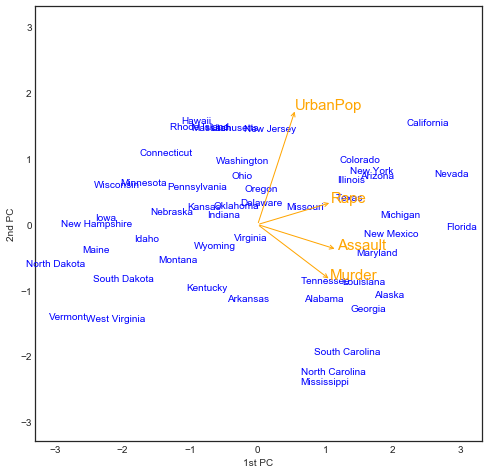

In [6]:
# the second pca component is inverted so the plot matches the book
# the original features as a function of the principal components have been scaled by 2 so they can be seen easier

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(pcaX[:, 0], pcaX[:, 1], s=0)
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')

for i, txt in enumerate(df_heart.index):
    ax.annotate(txt, (pcaX[i, 0], -pcaX[i, 1]), horizontalalignment='center', verticalalignment='center', color='b')
    
components = pca.components_
for i, col in enumerate(df_heart.columns.tolist()):
    ax.annotate('', xy=(2*components[0, i], -2*components[1, i]), xytext=(0, 0), arrowprops=dict(arrowstyle="->", ec="orange"))
    ax.text(2*components[0, i], -2*components[1, i], col, size=15, color='orange')
    
ax.set_ylim(ax.get_xlim());

#### Figure details
The first two principal components for the USArrests data.
- The blue state names represent the scores for the first two
principal components.
- The orange arrows indicate the first two principal
component loading vectors (with axes on the top and
right). For example, the loading for Rape on the first
component is 0:54, and its loading on the second principal
component 0:17 [the word Rape is centered at the point
(0:54; 0:17)].
- This figure is known as a biplot, because it displays both
the principal component scores and the principal
component loadings.

### Proportion Variance Explained
- To understand the strength of each component, we are interested in knowing the proportion of variance explained (PVE) by each one.
- The total variance present in a data set (assuming that the variables have been centered to have mean zero) is defined
as
$$
\sum_{j=1}^{p} \operatorname{Var}\left(X_{j}\right)=\sum_{j=1}^{p} \frac{1}{n} \sum_{i=1}^{n} x_{i j}^{2}
$$
and the variance explained by the $m$ th principal component is
$$
\operatorname{Var}\left(Z_{m}\right)=\frac{1}{n} \sum_{i=1}^{n} z_{i m}^{2}
$$
- It can be shown that $\sum_{j=1}^{p} \operatorname{Var}\left(X_{j}\right)=\sum_{m=1}^{M} \operatorname{Var}\left(Z_{m}\right)$
with $M=\min (n-1, p)$
- Therefore, the PVE of the $m$ th principal component is given by the positive quantity between 0 and 1
$\frac{\sum_{i=1}^{n} z_{i m}^{2}}{\sum_{j=1}^{p=1} \sum_{i=1} x_{i j}^{2}}$
- The PVEs sum to one. We sometimes display the cumulative PVEs.

In [7]:
scaled_pca = make_pipeline(StandardScaler(), PCA())
pca = scaled_pca.named_steps['pca']
scaled_pca.fit(X)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

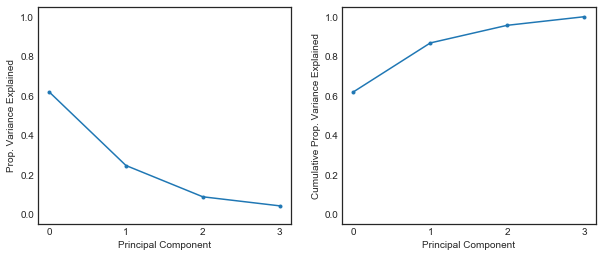

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(range(0, pca.n_components_), pca.explained_variance_ratio_, '.-')
ax1.set_ylabel('Prop. Variance Explained')

ax2.plot(range(0, pca.n_components_), np.cumsum(pca.explained_variance_ratio_), '.-')
ax2.set_ylabel('Cumulative Prop. Variance Explained')

for ax in (ax1, ax2):
    ax.set_ylim(bottom=-0.05, top=1.05)
    ax.get_xaxis().set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.set_xlabel('Principal Component')

### How many principal components should we use?
If we use principal components as a summary of our data, how
many components are sufficient?
- No simple answer to this question, as cross-validation is not
available for this purpose.
    - Why not?
    - When could we use cross-validation to select the number of
components?
- the "screen plot" on the previous slide can be used as a
guide: we look for an "elbow".

### Clustering
- Clustering refers to a very broad set of techniques for
finding subgroups, or clusters, in a data set.
- We seek a partition of the data into distinct groups so that
the observations within each group are quite similar to
each other,
- It make this concrete, we must define what it means for
two or more observations to be similar or diffierent.
- Indeed, this is often a domain-specific consideration that
must be made based on knowledge of the data being
studied.

### PCA vs Clustering
- PCA looks for a low-dimensional representation of the
observations that explains a good fraction of the variance.
- Clustering looks for homogeneous subgroups among the
observations.

### Clustering for Market Segmentation
- Suppose we have access to a large number of measurements
(e.g. median household income, occupation, distance from
nearest urban area, and so forth) for a large number of
people.
- Our goal is to perform market segmentation by identifying
subgroups of people who might be more receptive to a
particular form of advertising, or more likely to purchase a
particular product.
- The task of performing market segmentation amounts to
clustering the people in the data set.

### Two clustering methods
- In K-means clustering, we seek to partition the
observations into a pre-specified number of clusters.
- In hierarchical clustering, we do not know in advance how
many clusters we want; in fact, we end up with a tree-like
visual representation of the observations, called a
dendrogram, that allows us to view at once the clusterings
obtained for each possible number of clusters, from 1 to n.

### Details of K-means clustering
Let $C_{1}, \ldots, C_{K}$ denote sets containing the indices of the observations in each cluster. These sets satisfy two properties:
1. $C_{1} \cup C_{2} \cup \ldots \cup C_{K}=\{1, \ldots, n\} .$ In other words, each observation belongs to at least one of the $K$ clusters.
2. $C_{k} \cap C_{k^{\prime}}=\emptyset$ for all $k \neq k^{\prime} .$ In other words, the clusters are non-overlapping: no observation belongs to more than one cluster.

For instance, if the $i$ th observation is in the $k$ th cluster, then $i \in C_{k}$

- The idea behind $K$ -means clustering is that a good clustering is one for which the within-cluster variation is as small as possible.
- The within-cluster variation for cluster $C_{k}$ is a measure $\mathrm{WCV}\left(C_{k}\right)$ of the amount by which the observations within a cluster differ from each other.
- Hence we want to solve the problem
$$
\underset{C_{1}, \ldots, C_{K}}{\operatorname{minimize}}\left\{\sum_{k=1}^{K} \mathrm{WCV}\left(C_{k}\right)\right\}
$$
In words, this formula says that we want to partition the observations into $K$ clusters such that the total within-cluster variation, summed over all $K$ clusters, is as small as possible.

### K-Means Clustering Algorithm
1. Randomly assign a number, from 1 to K, to each of the
observations. These serve as initial cluster assignments for
the observations.
2. Iterate until the cluster assignments stop changing:
    2.1 For each of the K clusters, compute the cluster centroid.
    The kth cluster centroid is the vector of the p feature means
    for the observations in the kth cluster.
    2.2 Assign each observation to the cluster whose centroid is
    closest (where closest is dened using Euclidean distance).

### Hierarchical Clustering
- K-means clustering requires us to pre-specify the number
of clusters K. This can be a disadvantage (later we discuss
strategies for choosing K)
- Hierarchical clustering is an alternative approach which
does not require that we commit to a particular choice of
K.
- In this section, we describe bottom-up or agglomerative
clustering. This is the most common type of hierarchical
clustering, and refers to the fact that a dendrogram is built
starting from the leaves and combining clusters up to the
trunk.

### Hierarchical Clustering Algorithm
The approach in words:
- Start with each point in its own cluster.
- Identify the closest two clusters and merge them.
- Repeat.
- Ends when all points are in a single cluster.

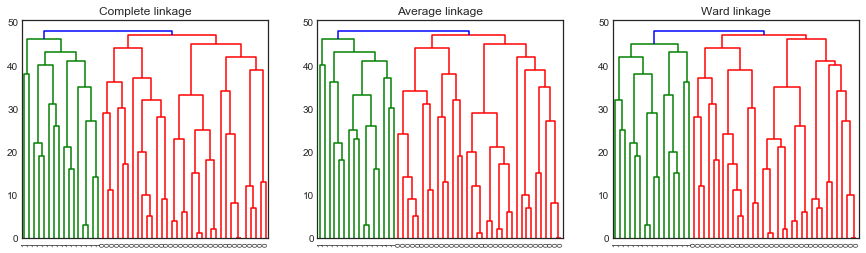

In [9]:
agg_complete = AgglomerativeClustering(affinity='euclidean', linkage='complete').fit(X)
agg_average = AgglomerativeClustering(affinity='euclidean', linkage='average').fit(X)
agg_ward = AgglomerativeClustering(affinity='euclidean', linkage='ward').fit(X)
def plot_dendrogram(model, labels=None, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    
    if labels is None:
        labels = model.labels_
    else:
        labels = [f'{lab1}_{lab2}' for lab1, lab2 in zip(model.labels_, labels)]

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=labels, **kwargs)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

color_threshold = 48

ax1.set_title('Complete linkage')
ax2.set_title('Average linkage')
ax3.set_title('Ward linkage')

plot_dendrogram(agg_complete, color_threshold=color_threshold, ax=ax1)
plot_dendrogram(agg_average, color_threshold=color_threshold, ax=ax2)
plot_dendrogram(agg_ward, color_threshold=color_threshold, ax=ax3)

### Details of previous figure
- Left: Dendrogram obtained from hierarchically clustering
the data from previous slide, with complete linkage and
Euclidean distance.
- Center: The dendrogram from the left-hand panel, cut at a
height of 9 (indicated by the dashed line). This cut results
in two distinct clusters, shown in different colors.
- Right: The dendrogram from the left-hand panel, now cut
at a height of 5. This cut results in three distinct clusters,
shown in different colors. Note that the colors were not
used in clustering, but are simply used for display purposes
in this figure

### Summary
- Unsupervised learning is important for understanding the
variation and grouping structure of a set of unlabeled data,
and can be a useful pre-processor for supervised learning
- It is intrinsically more difficult than supervised learning
because there is no gold standard (like an outcome
variable) and no single objective (like test set accuracy)
- It is an active field of research, with many recently
developed tools such as self-organizing maps, independent
components analysis and spectral clustering.

### End of Chapter  10